In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

df=pd.read_csv("weather.csv")
df.head(5)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


In [2]:
df['RainTomorrow'] = df['RainTomorrow'].replace({'Yes': 1, 'No': 0})
df['RainToday'] = df['RainToday'].replace({'Yes': 1, 'No': 0})
df.drop(['WindGustDir','WindDir9am','WindDir3pm','Sunshine','Evaporation','WindGustSpeed','WindSpeed9am'], axis = 1,inplace=True)
df["MinTemp"] =df['MinTemp'].astype('int')
df["MaxTemp"] =df['MaxTemp'].astype('int')
df["Rainfall"] =df['Rainfall'].astype('int')
df["Pressure9am"] =df['Pressure9am'].astype('int')
df["Pressure3pm"] =df['Pressure3pm'].astype('int')
df["Temp9am"] =df['Temp9am'].astype('int')
df["Temp3pm"] =df['Temp3pm'].astype('int')
df["RISK_MM"] =df['RISK_MM'].astype('int')
df.head(5)

,MinTemp,MaxTemp,Rainfall,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8,24,0,20,68,29,1019,1015,7,7,14,23,0,3,1
1,14,26,3,17,80,36,1012,1008,5,3,17,25,1,3,1
2,13,23,3,6,82,69,1009,1007,8,7,15,20,1,39,1
3,13,15,39,24,62,56,1005,1007,2,7,13,14,1,2,1
4,7,16,2,28,68,49,1018,1018,7,7,11,15,1,0,0


In [3]:
print("Number of columns/measurements:"+str(len(df.index)))

Number of columns/measurements:366


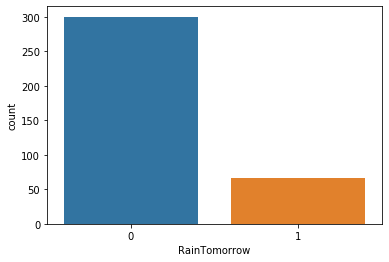

In [4]:
sns.countplot(x='RainTomorrow',data=df)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   MinTemp       366 non-null    int64
 1   MaxTemp       366 non-null    int64
 2   Rainfall      366 non-null    int64
 3   WindSpeed3pm  366 non-null    int64
 4   Humidity9am   366 non-null    int64
 5   Humidity3pm   366 non-null    int64
 6   Pressure9am   366 non-null    int64
 7   Pressure3pm   366 non-null    int64
 8   Cloud9am      366 non-null    int64
 9   Cloud3pm      366 non-null    int64
 10  Temp9am       366 non-null    int64
 11  Temp3pm       366 non-null    int64
 12  RainToday     366 non-null    int64
 13  RISK_MM       366 non-null    int64
 14  RainTomorrow  366 non-null    int64
dtypes: int64(15)
memory usage: 43.0 KB


In [6]:
df.isnull().sum()

MinTemp         0
MaxTemp         0
Rainfall        0
WindSpeed3pm    0
Humidity9am     0
Humidity3pm     0
Pressure9am     0
Pressure3pm     0
Cloud9am        0
Cloud3pm        0
Temp9am         0
Temp3pm         0
RainToday       0
RISK_MM         0
RainTomorrow    0
dtype: int64

In [7]:

#df.replace(to_replace=["Yes","No"],value=[1,0])



X=df.drop("RainTomorrow",axis=1)
y=df["RainTomorrow"]
df.head(5)

,MinTemp,MaxTemp,Rainfall,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8,24,0,20,68,29,1019,1015,7,7,14,23,0,3,1
1,14,26,3,17,80,36,1012,1008,5,3,17,25,1,3,1
2,13,23,3,6,82,69,1009,1007,8,7,15,20,1,39,1
3,13,15,39,24,62,56,1005,1007,2,7,13,14,1,2,1
4,7,16,2,28,68,49,1018,1018,7,7,11,15,1,0,0


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.7,random_state=1)

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
log=LogisticRegression()


In [12]:
log.fit(X_train,y_train)

/Users/saicharan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
df.head(5)

,MinTemp,MaxTemp,Rainfall,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8,24,0,20,68,29,1019,1015,7,7,14,23,0,3,1
1,14,26,3,17,80,36,1012,1008,5,3,17,25,1,3,1
2,13,23,3,6,82,69,1009,1007,8,7,15,20,1,39,1
3,13,15,39,24,62,56,1005,1007,2,7,13,14,1,2,1
4,7,16,2,28,68,49,1018,1018,7,7,11,15,1,0,0


In [14]:
from sklearn.metrics import accuracy_score

In [15]:
pred=log.predict(X_test)

In [16]:
accuracy_score(y_test,pred)

0.9766536964980544

In [17]:
from sklearn.metrics import *
classification_report(y_test,pred)

'              precision    recall  f1-score   support\n\n           0       0.98      1.00      0.99       212\n           1       0.98      0.89      0.93        45\n\n    accuracy                           0.98       257\n   macro avg       0.98      0.94      0.96       257\nweighted avg       0.98      0.98      0.98       257\n'

In [18]:
confusion_matrix(y_test,pred)

array([[211,   1],
       [  5,  40]])